In [1]:
from src.data import get_data, difference_data
import src.plotting as plotting
from src.modelling import fit_lm

plotting.set_theme()

alpha = 0.05

### **Step 1:** Get the Data

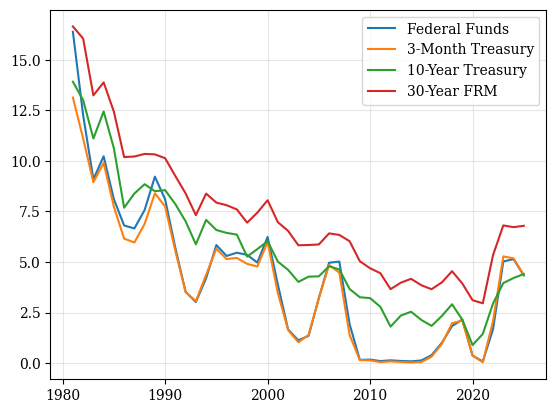

In [2]:
data = get_data()
_ = data.plot()

### **Step 2:** Preprocessing

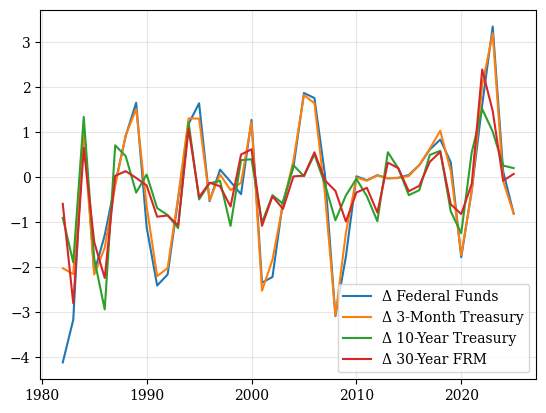

In [3]:
diff_data = difference_data(data)
_ = diff_data.plot()

### **Step 3:** Analyze Rates' Relationships

                            OLS Regression Results                            
Dep. Variable:     Δ 3-Month Treasury   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     651.7
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           3.35e-27
Time:                        15:24:36   Log-Likelihood:                -13.932
No. Observations:                  44   AIC:                             31.86
Df Residuals:                      42   BIC:                             35.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.052     

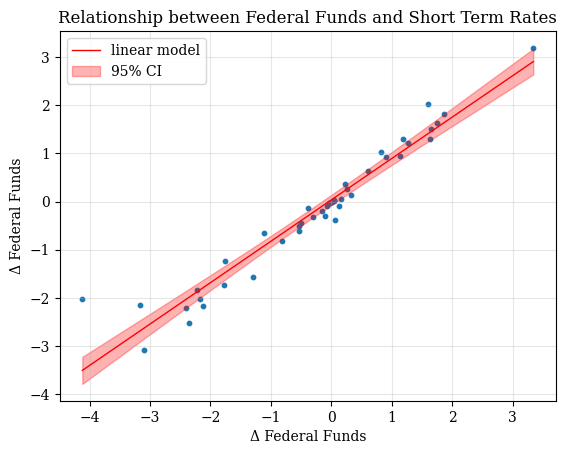

In [4]:
pred_3mo_from_ff, lm_3mo_from_ff = fit_lm(
    x=diff_data["Δ Federal Funds"],
    y=diff_data["Δ 3-Month Treasury"]
)

print(lm_3mo_from_ff.summary())

plotting.plot_lm(
    x=diff_data["Δ Federal Funds"],
    y=diff_data["Δ 3-Month Treasury"],
    predict_with_ci=pred_3mo_from_ff,
    alpha=alpha,
    title="Relationship between Federal Funds and Short Term Rates"
)

                            OLS Regression Results                            
Dep. Variable:     Δ 10-Year Treasury   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     38.75
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.89e-07
Time:                        15:24:37   Log-Likelihood:                -42.224
No. Observations:                  44   AIC:                             88.45
Df Residuals:                      42   BIC:                             92.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1265      0

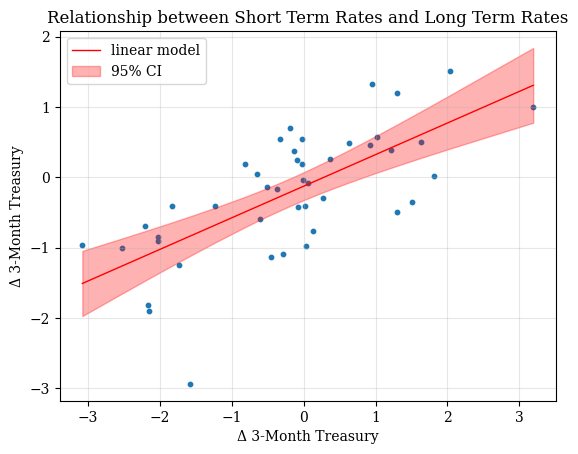

In [5]:
pred_10y_from_3mo, lm_10y_from_3mo = fit_lm(
    x=diff_data["Δ 3-Month Treasury"],
    y=diff_data["Δ 10-Year Treasury"]
)

print(lm_10y_from_3mo.summary())

plotting.plot_lm(
    x=diff_data["Δ 3-Month Treasury"],
    y=diff_data["Δ 10-Year Treasury"],
    predict_with_ci=pred_10y_from_3mo,
    alpha=alpha,
    title="Relationship between Short Term Rates and Long Term Rates"
)

                            OLS Regression Results                            
Dep. Variable:          Δ 30-Year FRM   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.32e-17
Time:                        15:24:37   Log-Likelihood:                -17.101
No. Observations:                  44   AIC:                             38.20
Df Residuals:                      42   BIC:                             41.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0314      0

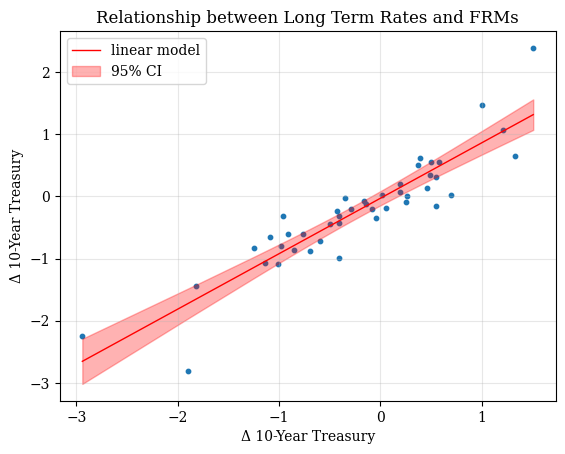

In [6]:
pred_30y_from_10y, lm_30y_from_10y = fit_lm(
    x=diff_data["Δ 10-Year Treasury"],
    y=diff_data["Δ 30-Year FRM"]
)

print(lm_30y_from_10y.summary())

plotting.plot_lm(
    x=diff_data["Δ 10-Year Treasury"],
    y=diff_data["Δ 30-Year FRM"],
    predict_with_ci=pred_30y_from_10y,
    alpha=alpha,
    title="Relationship between Long Term Rates and FRMs"
)